# Airport communities network

In [1]:
## autoreload 
%load_ext autoreload
%autoreload 2

In [2]:
## import libraries 
import networkx as nx 
import matplotlib.pyplot as plt
from community import community_louvain
import networkx.algorithms.community as nx_comm
import igraph as ig

In [3]:
## helper functions 
from src.helpers.community import NetworkXCommunityAlgs, IgraphCommunityAlgs

from src.helpers.config import config_dict
from src.helpers.helpers import get_file_dict, read_clu,lol2idx,dict_vals_to_list,load_graph_coords
from src.helpers.metrics import (nmi,
                                 jaccard_index,
                                 rand_index,
                                 nvi_from_nmi)
from src.helpers.dataloader import get_net_clu_files, make_file_dict
from src.helpers.plotters import plot_graph_partition_original



In [4]:
airports = "./data/real/airports_UW.net"
g = ig.read(airports)
g_airport = ig.Graph.Read_Pajek(airports)

## Algorithms

### Girvan Newman algorithm

In [8]:

def girvan_newman(g):
    # Use edge betweenness to detect communities
    communities = g.community_edge_betweenness()
    # ... and convert into a VertexClustering for plotting
    communities = communities.as_clustering()

    # Color each vertex and edge based on its community membership
    num_communities = len(communities)
    palette = ig.RainbowPalette(n=num_communities)
    for i, community in enumerate(communities):
        g.vs[community]["color"] = i
        community_edges = g.es.select(_within=community)
        community_edges["color"] = i
    return (communities, palette)

### Fast greedy algorithm

In [6]:
def fast_greedy(g):
    communities_fastgreedy = g.community_fastgreedy()
    communities_fastgreedy  = communities_fastgreedy.as_clustering()
    # Color each vertex and edge based on its community membership
    num_communities = len(communities_fastgreedy)
    palette = ig.RainbowPalette(n=num_communities)
    for i, community in enumerate(communities_fastgreedy):
        g.vs[community]["color"] = i
        community_edges = g.es.select(_within=community)
        community_edges["color"] = i

    return (communities_fastgreedy, palette)

### Label propagation

In [7]:
def label_propagation(g):
        
    communities_label_propagation = g.community_label_propagation()
    num_communities = len(communities_label_propagation)
    palette = ig.RainbowPalette(n=num_communities)
    for i, community in enumerate(communities_label_propagation):
        g.vs[community]["color"] = i
        community_edges = g.es.select(_within=community)
        community_edges["color"] = i
        
    return (communities_label_propagation, palette)

## Getting communities

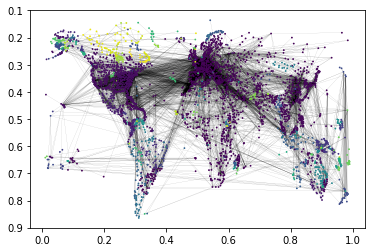

'label_prop_airports'

In [9]:
# Label propagation
layout_new = g.layout("kamada_kawai")
label_propagation_igraph = IgraphCommunityAlgs(g_airport,method='label_prop_airports',layout = layout_new, verbosity=False)
label_propagation_igraph.method

In [10]:
fast_greedy_airports, pallete_greedy = fast_greedy(g_airport)
label_prop_airports, lb_palette = label_propagation(g_airport)

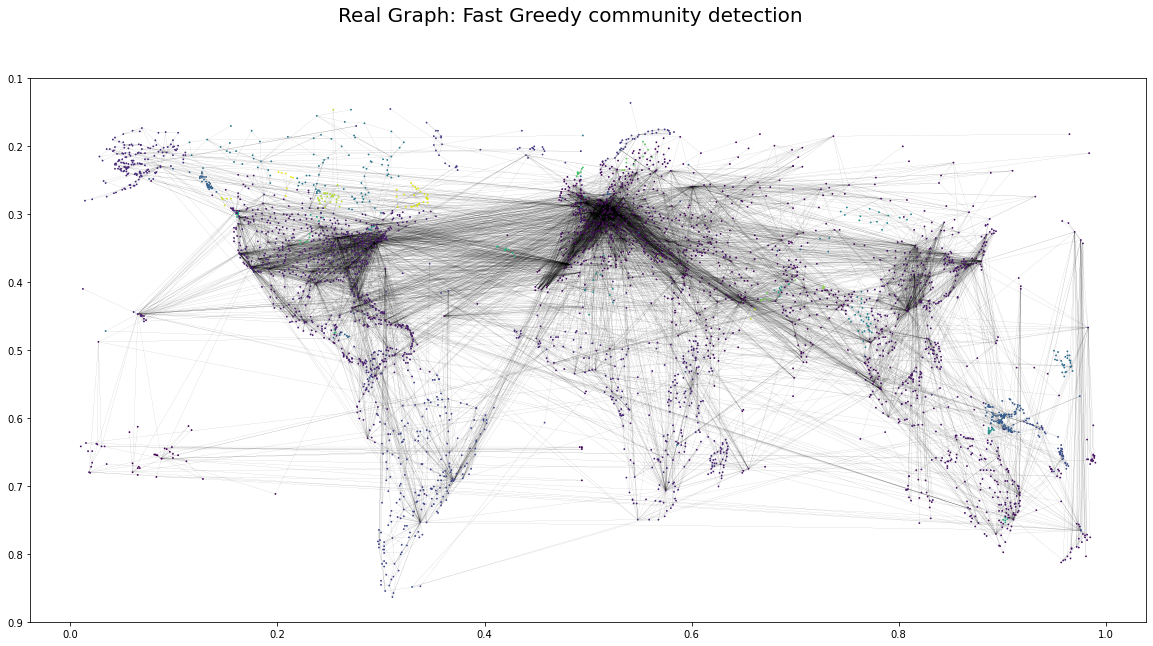

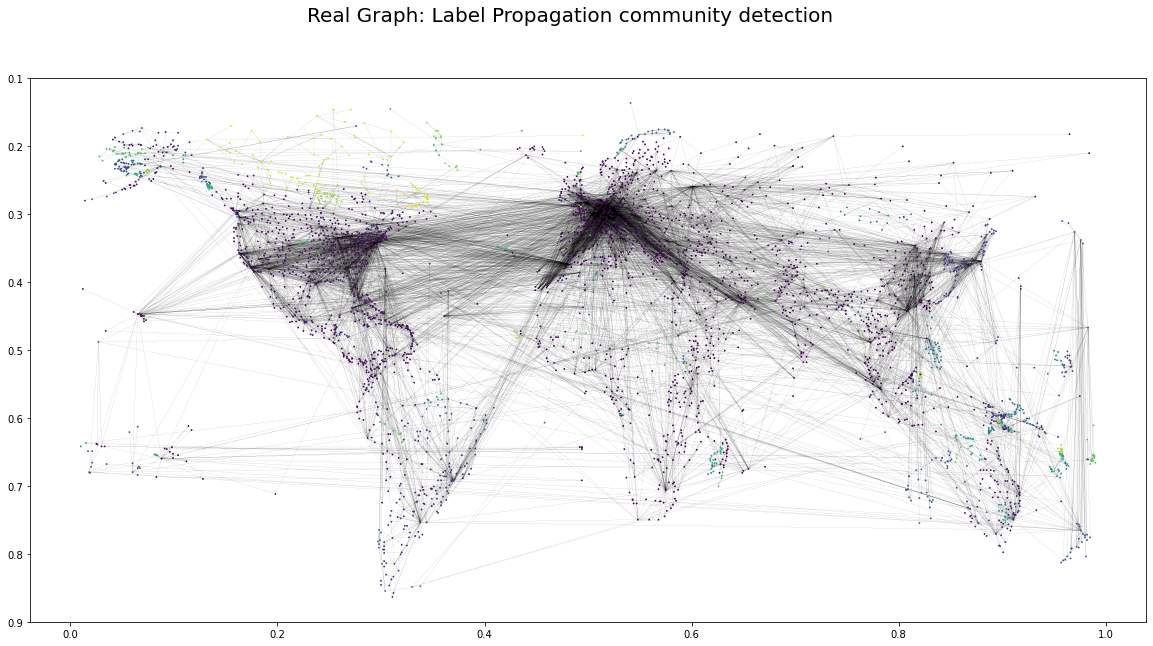

In [16]:
#Girvan Newman
def draw_real_graph(communities,palette, NAME):
    # Plot with only vertex and edge coloring
    fig, ax = plt.subplots()
    #change the size of the plot
    fig.set_size_inches(20,10)
    fig.suptitle(NAME, fontsize=20)
    ig.plot(
        communities,
        palette=palette,
        edge_width=0.05,
        target=ax,
        vertex_size=0.8,
    )
    ax.invert_yaxis() # igraph plots y-axis from top to bottom
    plt.show()
    return fig


    
fig_greedy = draw_real_graph(fast_greedy_airports, pallete_greedy,"Real Graph: Fast Greedy community detection")
fig_lp = draw_real_graph(label_prop_airports, lb_palette,"Real Graph: Label Propagation community detection")